In [14]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

np.random.seed(999)
n_points = 50
xs = np.random.randn(n_points)
ys = np.random.randn(n_points)



d = np.zeros((n_points, n_points))
for i in range(n_points):
    for j in range(n_points):
        d[i,j] = np.sqrt((xs[i] - xs[j])**2 + (ys[i]-ys[j])**2)

#print(d)

radius = 1

r = d < radius
r = r.astype(float)
r = r - np.identity(n_points)




In [15]:
def max_points_with_rejection(r):
    n_points = r.shape[0]
    x = cp.Variable(n_points )
    b = cp.Variable(n_points, boolean=True)
    weight = np.random.randn(n_points)*1e-3 + 1
    N = n_points*300 # anything >> len(x)
    prob = cp.Problem(cp.Maximize(weight @ x - 1/N*cp.sum(b)),
                     [
                        r @ x <= N * b,
                        x + b <= 1,
                        x<=1,
                        x>=0
                     ])
    print(prob.solve(solver='CBC'))
    return x.value

x = max_points_with_rejection(r)

12.003512267779668


[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0.]


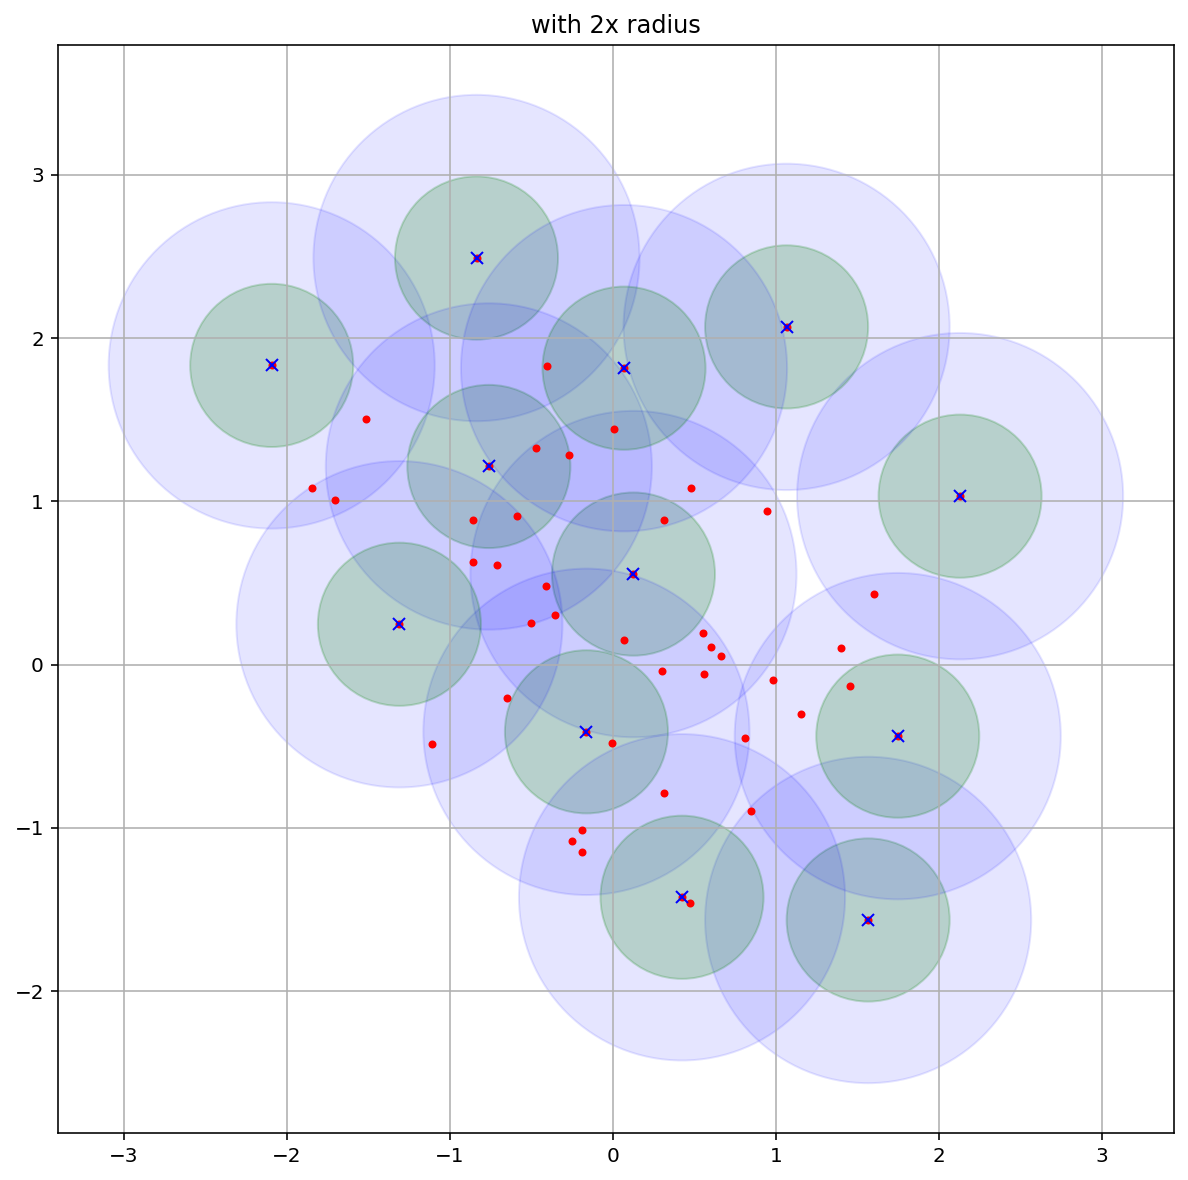

In [16]:
print(x)
plt.figure(figsize=(10,10))
plt.plot(xs, ys, '.r')
for i, v in enumerate(x):
    if v > 0.5:
        plt.plot(xs[i], ys[i], 'xb')
        circle = plt.Circle((xs[i], ys[i]), radius, alpha=0.1, color='blue')
        plt.gca().add_patch(circle)
        circle = plt.Circle((xs[i], ys[i]), radius/2, alpha=0.2, color='green')
        plt.gca().add_patch(circle)
       
        plt.title('with 2x radius')
plt.axis('equal')
plt.grid()

In [ ]:
#make 2r cover everyone -> max min (distance between all pairs)?